In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

## 例子1：探讨不同罚函数的效果区别

In [2]:
np.random.seed(2)

epsilon = 0.5
m = 100
n = 30
A = np.random.rand(m,n)
c = np.random.rand(n)
b = A @ c + epsilon * np.random.randn(m)

status: optimal
optimal value 19.1218


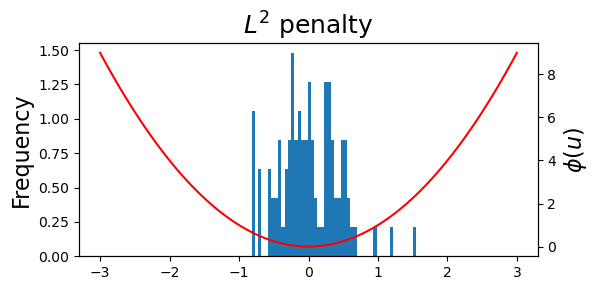

Percentage of non-zero elements is 8.21 %


In [3]:
# 创建优化变量
x = cp.Variable(n)

# 创建限制条件
constraints = []

# 创建目标函数
obj = cp.Minimize(cp.norm(A @ x - b, 2)**2)

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value {:.4f}".format(prob.value))

fig, ax1 = plt.subplots(figsize=(6,3))
ax1.hist(A @ x.value - b, bins=50, density=True)
ax1.set_ylabel("Frequency", fontsize=16)

ax2 = ax1.twinx()
x_grid = np.linspace(-3, 3, 100)
ax2.plot(x_grid, x_grid**2, color="red")
ax2.set_ylabel(r"$\phi(u)$", fontsize=16)
plt.title(r"$L^2$ penalty", fontsize=18)

plt.tight_layout()
plt.show()

bin_edges_custom = np.linspace(start=-2, stop=2, num=1000)
hist, _ = np.histogram(A @ x.value - b, bins=bin_edges_custom)
print("Percentage of non-zero elements is {:.2f} %".format(np.sum(hist != 0)/len(hist) * 100))

status: optimal
optimal value 31.6124


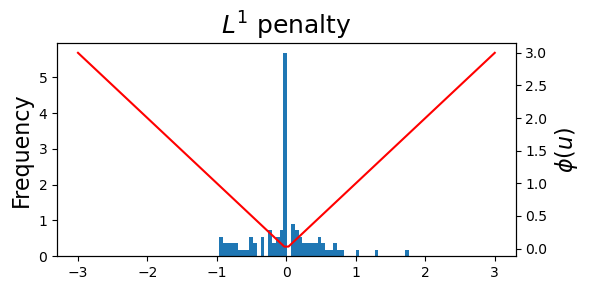

Percentage of non-zero elements is 6.71 %


In [4]:
# 创建优化变量
x = cp.Variable(n)

# 创建限制条件
constraints = []

# 创建目标函数
obj = cp.Minimize(cp.norm(A @ x - b, 1))

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value {:.4f}".format(prob.value))

# 绘制结果
fig, ax1 = plt.subplots(figsize=(6,3))
ax1.hist(A @ x.value - b,  bins=50, density=True)
ax1.set_ylabel("Frequency", fontsize=16)

ax2 = ax1.twinx()
x_grid = np.linspace(-3, 3, 100)
ax2.plot(x_grid, np.abs(x_grid), color="red")
ax2.set_ylabel(r"$\phi(u)$", fontsize=16)
plt.title(r"$L^1$ penalty", fontsize=18)
plt.tight_layout()
plt.show()

hist, _ = np.histogram(A @ x.value - b, bins=bin_edges_custom)
print("Percentage of non-zero elements is {:.2f} %".format(np.sum(hist != 0)/len(hist)*100))

status: optimal
optimal value 1.7622


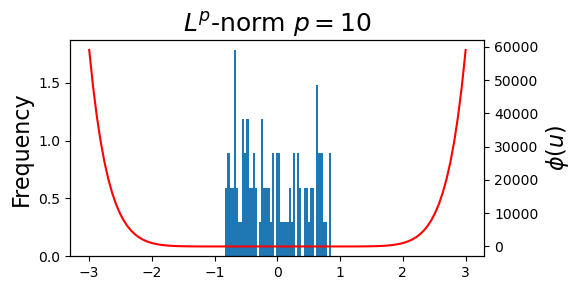

Percentage of non-zero elements is 9.21 %


In [5]:
# 创建优化变量
x = cp.Variable(n)

# 创建限制条件
constraints = []

p = 10

# 创建目标函数
obj = cp.Minimize(cp.norm(A @ x - b, p)**p)

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value {:.4f}".format(prob.value))

# 绘制结果
fig, ax1 = plt.subplots(figsize=(6,3))
ax1.hist(A @ x.value - b,  bins=50, density=True)
ax1.set_ylabel("Frequency", fontsize=16)

ax2 = ax1.twinx()
x_grid = np.linspace(-3, 3, 100)
ax2.plot(x_grid, np.abs(x_grid)**p, color="red")
ax2.set_ylabel(r"$\phi(u)$", fontsize=16)
plt.title(r"$L^p$-norm $p=${:d}".format(p), fontsize=18)
plt.tight_layout()
plt.show()

hist, _ = np.histogram(A @ x.value - b, bins=bin_edges_custom)
print("Percentage of non-zero elements is {:.2f} %".format(np.sum(hist != 0)/len(hist)*100))

status: optimal
optimal value 31.3111


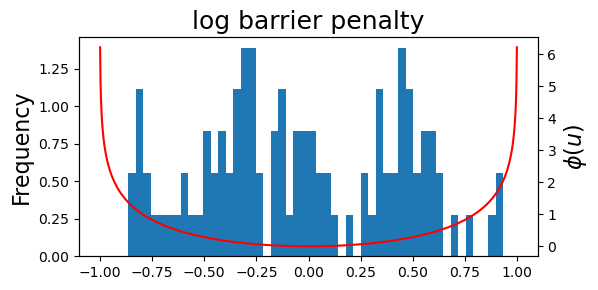

In [6]:
a = 1.0

# 创建优化变量
x = cp.Variable(n)

# 创建限制条件
constraints = []

# 创建目标函数
obj = cp.Minimize(-a**2 * cp.sum(cp.log(1 - cp.power(A @ x - b,2)/a**2)))

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value {:.4f}".format(prob.value))

# 绘制结果
fig, ax1 = plt.subplots(figsize=(6,3))
ax1.hist(A @ x.value - b,  bins=50, density=True)
ax1.set_ylabel("Frequency", fontsize=16)

ax2 = ax1.twinx()
x_grid = np.linspace(-a+0.001, a-0.001, 1000)
ax2.plot(x_grid, -a**2 * np.log(1-x_grid**2/a**2),  color="red")
ax2.set_ylabel(r"$\phi(u)$", fontsize=16)

plt.title("log barrier penalty", fontsize=18)
plt.tight_layout()
plt.show()

status: optimal
optimal value 3.8604


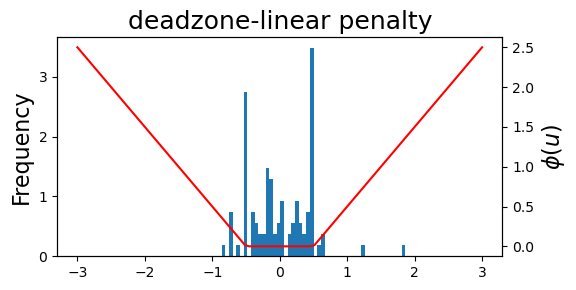

In [7]:
def f(u, a):
    if np.abs(u) <= a:
        return 0
    else:
        return np.abs(u) - a

a = 0.5
φ_func = lambda u : f(u, a)

# 创建优化变量
x = cp.Variable(n)

# 创建限制条件
constraints = []

# 创建目标函数
obj = cp.Minimize(cp.sum(cp.pos(cp.abs(A @ x - b) - a)))

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value {:.4f}".format(prob.value))

# 绘制结果
fig, ax1 = plt.subplots(figsize=(6,3))
ax1.hist(A @ x.value - b,  bins=50, density=True)
ax1.set_ylabel("Frequency", fontsize=16)

ax2 = ax1.twinx()

x_grid = np.linspace(-3, 3, 100)
ax2.plot(x_grid, [φ_func(item) for item in x_grid], color="red")
ax2.set_ylabel(r"$\phi(u)$", fontsize=16)
plt.title("deadzone-linear penalty", fontsize=18)
plt.tight_layout()
plt.show()

## 例子2：鲁棒性

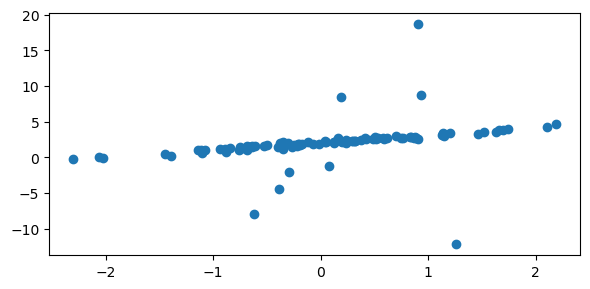

In [8]:
np.random.seed(1)

epsilon = 10.0
m = 100
n = 2

x_data = np.random.randn(m,1)
A = np.hstack([x_data, np.ones((m,1))])

# 真解
c = [1.0, 2.0]
b = A @ c + 0.2 * np.random.randn(m) + epsilon * np.random.randn(m) * (np.random.rand(m) < 0.05)

plt.figure(figsize=(6,3))
plt.scatter(x_data, b)
plt.tight_layout()
plt.show()

In [9]:
# 创建优化变量
alpha_l2 = cp.Variable(n)

# 创建限制条件
constraints = []

# 创建目标函数
obj = cp.Minimize(cp.norm(A @ alpha_l2 - b, 2)**2)

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value {:.2f}".format(prob.value))
print("optimal value [{:.4f}, {:.4f}]".format(alpha_l2.value[0], alpha_l2.value[1]))

status: optimal
optimal value 713.14
optimal value [1.1626, 1.9229]


In [10]:
# 创建优化变量
alpha_l1 = cp.Variable(n)

# 创建限制条件
constraints = []

# 创建目标函数
obj = cp.Minimize(cp.norm(A @ alpha_l1 - b, 1))

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value {:.2f}".format(prob.value))
print("optimal value [{:.4f}, {:.4f}]".format(alpha_l1.value[0], alpha_l1.value[1]))

status: optimal
optimal value 78.96
optimal value [1.0233, 2.0437]


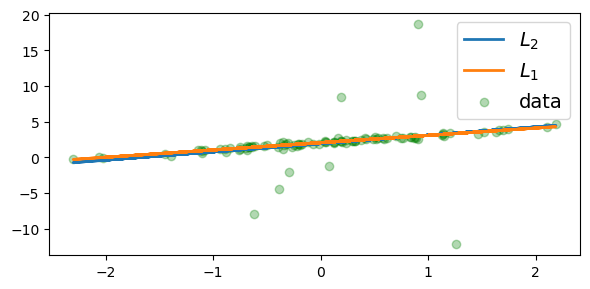

In [11]:
plt.figure(figsize=(6,3))
plt.plot(x_data, alpha_l2.value[0] * x_data + alpha_l2.value[1], label=r"$L_2$", lw=2.0)
plt.plot(x_data, alpha_l1.value[0] * x_data + alpha_l1.value[1], label=r"$L_1$", lw=2.0)
plt.scatter(x_data, b, label="data", alpha=0.3, color="green")
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()